---
# **データサイエンス基礎　第14回課題**
## **【モンテカルロ法】円周率を数値解析的に求める**
---
### 1. 各数値解析の結果を評価するための関数を用意

#### (1) 誤差を計算する関数
　算出された円周率の値と，真の円周率の絶対誤差および相対誤差を計算するプログラムを用意する．

#### (2) 計算時間を計測する関数
　数値解析によって円周率を算出するまでの時間を計測するプログラムを用意する．

#### (3) グラフに描画する関数
　データ数が $10^n$ の場合は円周率の出力とグラフの描画を行うプログラムを用意する．

In [93]:
# ライブラリの読み込み
# %pip install --upgrade pip
# %pip install numpy
# %pip install matplotlib
# %pip install pandas
# %pip install openpyxl
# %pip install sympy
# %pip install scipy
# %pip install re
# %pip install jaconv
# %pip install scikit-learn
# %pip install statsmodels
# %pip install seaborn
# %pip install pmdarima
# %pip install kneed
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module='seaborn')
warnings.filterwarnings("ignore", category=DeprecationWarning)
from matplotlib.font_manager import FontProperties
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import sympy as sp
import scipy.stats as stats
import re
import jaconv 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import itertools
import matplotlib.dates as mdates
import pmdarima as pm
from IPython.display import clear_output
from sklearn.metrics import r2_score, f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import time


# 誤差を計算する関数
def calculate_errors(pi) :
    TRUE_PI = math.pi
    absolute_error = abs(pi - TRUE_PI)
    relative_error = absolute_error / TRUE_PI * 100
    print(f'PI value : {pi:.15f}, Error : {absolute_error:.15f} ({relative_error:.8f} %)')
    return absolute_error, relative_error


# 計算時間を計測する関数
def measure_time(start_time) :
    if start_time == None :
        start_time = time.time()
        return start_time
    else :
        calculate_time = time.time() - start_time
        print(f'Calculating time : {calculate_time:.3f} s')
        return calculate_time


# グラフを描画する関数
def plot_circle(iterations, judgement) :
    start_time = time.time()
    ax = None
    if judgement :
        fig = plt.figure()
        plt.rcParams['font.family'] = 'Times New Roman'
        ax = fig.add_subplot(1, 1, 1)
        ax.axis("scaled")
        c1 = plt.Circle((0, 0), radius=1, fc="None", ec="r", linewidth=2, color="black", zorder=2)
        ax.add_patch(c1)
        ax.set_xlim(-1.2, 1.2)
        ax.set_ylim(-1.2, 1.2)
        plt.title(f'Iteration : {iterations} ')
    plot_time = time.time() - start_time
    return plot_time, ax

### 2. モンテカルロ法
　モンテカルロ法とは，$-1<x<1$，$-1<y<1$ の範囲にランダムに点をプロットし，原点からの距離が1以下である範囲内にプロットされた割合から，円周率を求めるものである．プロットが多くなるほど，真の円周率に近づくものと考えられる．  
　以下に，モンテカルロ法で実際に円周率を求めた結果を示す．

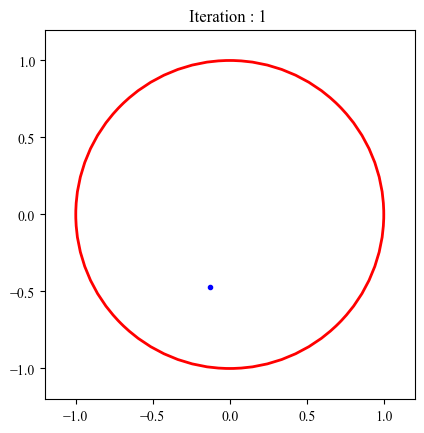

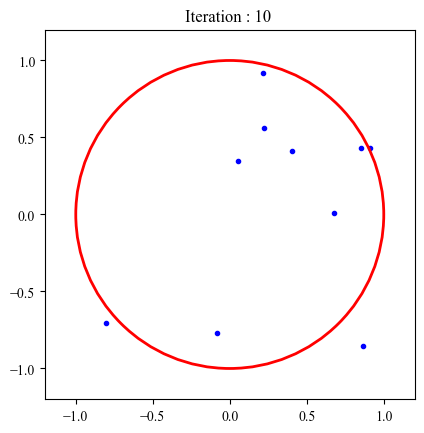

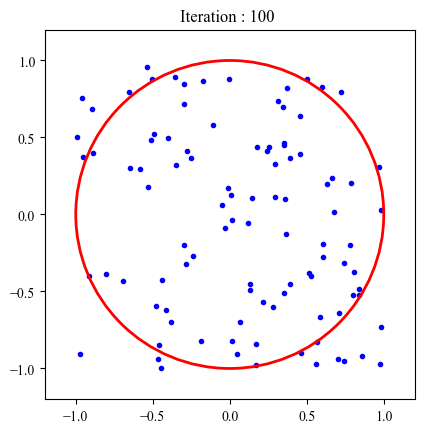

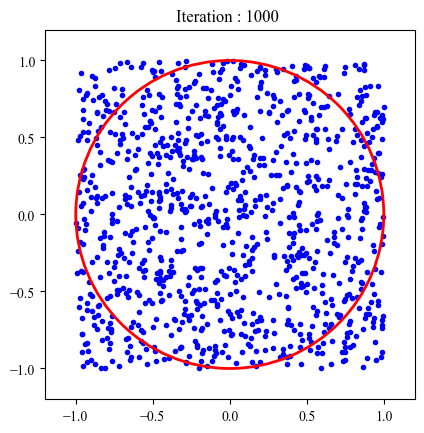

In [94]:
# モンテカルロ法
def monte_carlo(iterations, ax) :
    counter = 0
    for iteration in range(iterations) :
        x, y = random.uniform(-1, 1), random.uniform(-1, 1)
        if ax != None :
            ax.scatter(x, y, marker=".", color="blue", zorder=1)
        if x**2 + y**2 <= 1 :
            counter += 1
    pi = counter / iterations * 4
    plt.show()
    return pi

# 10000回で確認
num = 10000
start_time = measure_time(None)
for iteration in range(1, num+1) :
    judgement = math.log10(iteration).is_integer()
    plot_time, ax = plot_circle(iteration, judgement)
    start_time += plot_time
    pi = monte_carlo(iteration, ax)
calculate_time = measure_time(start_time)
absolute_error, relative_error = calculate_errors(pi)
print(f'Monte Carlo Method : Total iteration is {num}.')

### 2. 格子点を利用した方法
　$-1<x<1$，$-1<y<1$ の範囲にプロットさせる格子点を利用して，原点からの距離が1以下である範囲内にプロットされた割合から，円周率を求めるものである．プロットが多くなるほど，真の円周率に近づくものと考えられる．  
　以下に，格子点を利用した方法によって実際に円周率を求めた結果を示す．

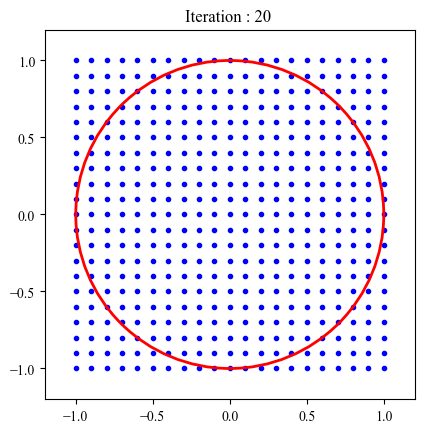

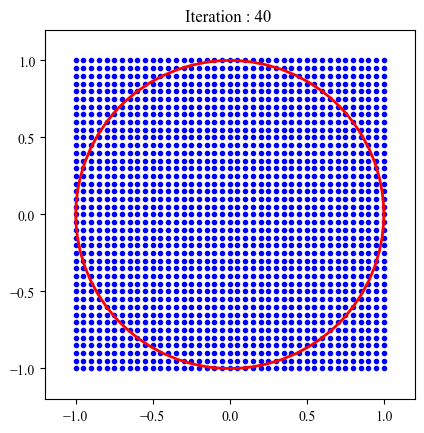

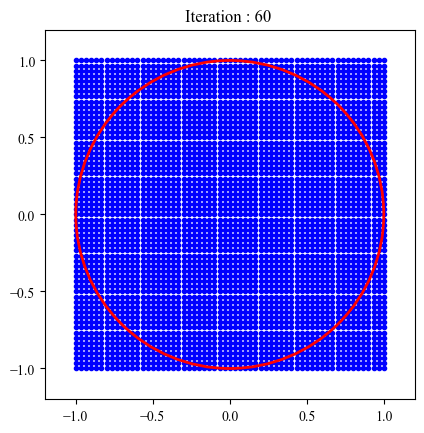

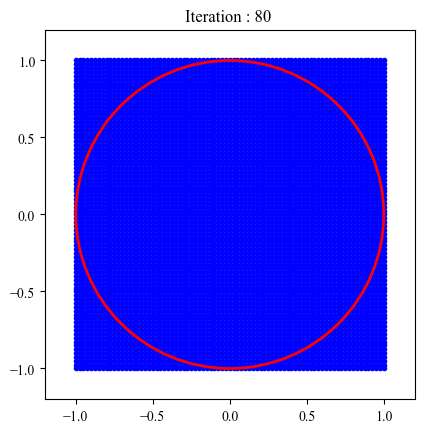

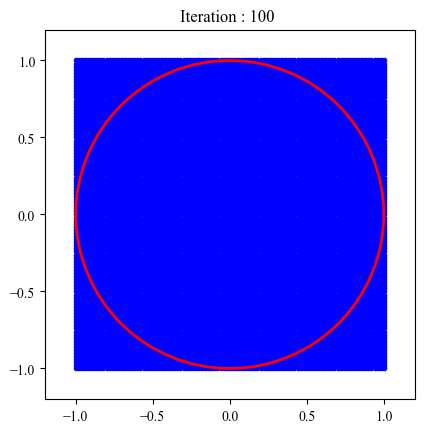

Calculating time : 119.857 s
PI value : 3.136400000000000, Error : 0.005192653589793 (0.16528730 %)
Grid Points Method : Total iteration is 100.


In [ ]:
# 格子点を利用した方法
def grid_points(grid, ax) :
    counter = 0
    for x in np.linspace(-1, 1, grid + 1) :
        for y in np.linspace(-1, 1, grid + 1) :
            if ax != None :
                ax.scatter(x, y, marker=".", color="blue", zorder=1)
            if x**2 + y**2 <= 1 :
                counter += 1
    pi = counter / grid**2 * 4
    plt.show()
    return pi

# 100回で確認
num = 100
start_time = measure_time(None)
for iteration in range(1, num+1) :
    judgement = iteration % 20 == 0 and iteration <= 100
    plot_time, ax = plot_circle(iteration, judgement)
    start_time += plot_time
    pi = grid_points(iteration, ax)
calculate_time = measure_time(start_time)
absolute_error, relative_error = calculate_errors(pi)
print(f'Grid Points Method : Total iteration is {num}.')

### 3. アルキメデスの方法
　アルキメデスの方法とは，円に内接する正$n$角形と，外接する正$n$角形の周の長さをそれぞれ算出することによって，円周はその範囲に含まれるため，円周率の範囲が絞り込めるというアルゴリズムである．今回は，単位円に内外接する正$n$角形の周の長さの平均値を円周の長さとして算出する．正$n$角形の頂点 $ n $ の数が増えれば，真の円周率に近づくものと考えられる．ここで，単位円に内外接する正$n$角形の1辺の長さは，次式により求まる．  
$$ \text{内接する正n角形の辺の長さ} = 2 \sin \left(\frac{\pi}{n}\right) $$  
$$ \text{外接する正n角形の辺の長さ} = 2 \tan \left(\frac{\pi}{n}\right) $$  
　以下に，アルキメデスの方法で実際に円周率を求めた結果を示す．

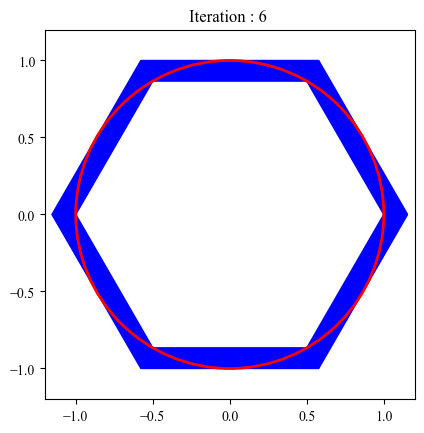

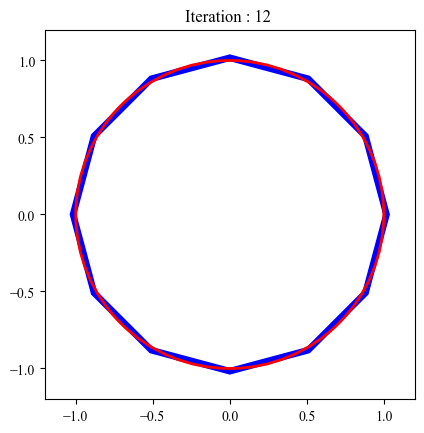

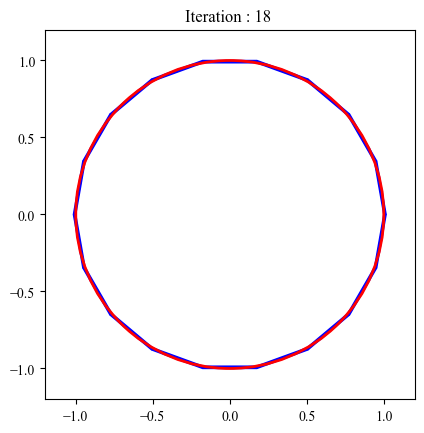

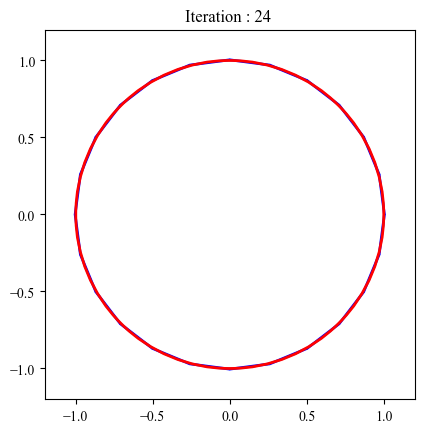

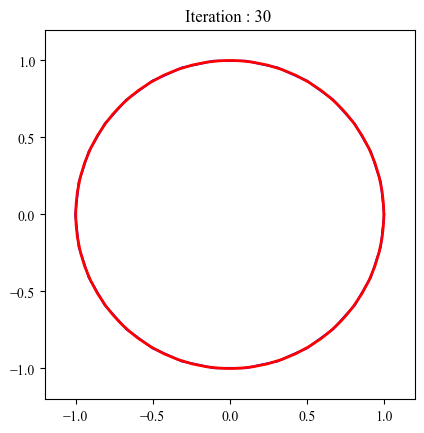

Calculating time : 2.103 s
PI value : 3.141592679428359, Error : 0.000000025838566 (0.00000082 %)
Archimedes Method : Total iteration is 10000.


In [ ]:
# アルキメデスの方法
def archimedes(n, ax) :
    polygon_angles = np.linspace(0, 2 * np.pi, n+1)
    x_in, y_in = np.cos(polygon_angles), np.sin(polygon_angles)
    x_out, y_out = np.cos(polygon_angles) / math.cos(math.pi / n), np.sin(polygon_angles) / math.cos(math.pi / n)
    if ax != None :
        for i in range(n):
            # 内接する多角形の頂点
            x1, y1 = x_in[i], y_in[i]
            x2, y2 = x_in[(i + 1) % n], y_in[(i + 1) % n]
            
            # 外接する多角形の頂点
            x3, y3 = x_out[(i + 1) % n], y_out[(i + 1) % n]
            x4, y4 = x_out[i], y_out[i]
            
            # 四角形を形成して塗りつぶす
            plt.fill([x1, x2, x3, x4], [y1, y2, y3, y4], color='blue')
    pi_in = n * math.sin(math.pi / n)
    pi_out = n * math.tan(math.pi / n)
    pi = 0.5 * (pi_in + pi_out)
    plt.show()
    return pi

# 100回で確認
num = 10000
start_time = measure_time(None)
for iteration in range(1, num+1) :
    judgement = iteration % 6 == 0 and iteration <= 30
    plot_time, ax = plot_circle(iteration, judgement)
    start_time += plot_time
    pi = archimedes(iteration, ax)
calculate_time = measure_time(start_time)
absolute_error, relative_error = calculate_errors(pi)
print(f'Archimedes Method : Total iteration is {num}.')

　したがって，今回の最適な主成分の数は 3 であると算出された．グラフを確認すると，クラスタ数 3 の部分で概ね傾きが緩やかに転じていることが確認できる．
### 4. 各手法の精度と計算時間の比較

In [ ]:
# 各手法における 100 iteration での精度の推移と計算時間の推移 
num = 100
data = []
for iteration in range(1, num+1) :
    clear_output(wait=True)
    print(f'>> Iteration : {iteration} / {num}')

    # モンテカルロ法
    print(f'・Monte Carlo Method')
    start_time = measure_time(None)
    pi = monte_carlo(iteration, ax)
    calculate_time = measure_time(start_time)
    absolute_error, relative_error = calculate_errors(pi)
    data.append([iteration, 'Monte Carlo', 'PI Value', pi])
    data.append([iteration, 'Monte Carlo', 'Absolute Error', absolute_error])
    data.append([iteration, 'Monte Carlo', 'Relative Error', relative_error])
    data.append([iteration, 'Monte Carlo', 'Calculate Time', calculate_time])

    # 格子点を利用した方法
    print(f'・Grid Points Method')
    start_time = measure_time(None)
    pi = grid_points(iteration, ax)
    calculate_time = measure_time(start_time)
    absolute_error, relative_error = calculate_errors(pi)
    data.append([iteration, 'Grid Points', 'PI Value', pi])
    data.append([iteration, 'Grid Points', 'Absolute Error', absolute_error])
    data.append([iteration, 'Grid Points', 'Relative Error', relative_error])
    data.append([iteration, 'Grid Points', 'Calculate Time', calculate_time])

    # アルキメデスの方法
    print(f'・Archimedes Method')
    start_time = measure_time(None)
    pi = archimedes(iteration, ax)
    calculate_time = measure_time(start_time)
    absolute_error, relative_error = calculate_errors(pi)
    data.append([iteration, 'Archimedes', 'PI Value', pi])
    data.append([iteration, 'Archimedes', 'Absolute Error', absolute_error])
    data.append([iteration, 'Archimedes', 'Relative Error', relative_error])
    data.append([iteration, 'Archimedes', 'Calculate Time', calculate_time])

df = pd.DataFrame(data, columns=['Iterations', 'Method', 'Value Name', 'Value'])
df.to_csv('data_dict.csv', index=False)

>> Iteration : 47 / 100
・Monte Carlo Method
Calculating time : 6.251 s
PI value : 3.148936170212766, Error : 0.007343516622973 (0.23375139 %)
・Grid Points Method


KeyboardInterrupt: 

In [ ]:
value_names = df['Value Name'].unique()
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()
for i, value_name in enumerate(value_names):
    ax = axs[i]
    sns.lineplot(data=df[df['Value Name'] == value_name], 
                x='Iterations', 
                y='Value', 
                hue='Method', 
                ax=ax)
    if i < 3:
        ax.set_xscale('log')
        ax.set_yscale('log')
    ax.set_title(value_name)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Value')
    ax.grid(True)
plt.tight_layout()
plt.show()



#### (4) 第3主成分までの関係 
　第1主成分を $x$ 軸，第2主成分を $y$ 軸，第3主成分を $z$ 軸にとった空間に，各天気概況あるいは各気象データの固有ベクトルをプロットする．

　主成分分析によって作成された主成分に関して，各主成分における天気概況や，気象データの固有ベクトルの値より，それぞれ以下の表ように考察することができる．
| Principal Component  | － | ＋ | 考察（備考） |
|:---------------:|:------:|:------:|:--------|
| 0  | 乾燥した晴（日照時間・風速・気圧） | 高温多湿（気温・蒸気圧） | 値が正に大きいと気温や蒸気圧が高く，高温多湿な環境であることを意味しており，負に大きいと日照時間・風速・気圧が高く，乾燥した晴天となることを意味する． |
| 1  | 悪天候（雨） | 晴れ（日照時間） | 値が正に大きいと日照時間が長く，晴れることを意味しており，負に大きいと湿度や降水降雪が多く，雨などの悪天候となることを意味する． |
| 2  | 高気圧 | 悪天候（風） | 値が正に大きいと風速や降水降雪が多く，風の強い悪天候となることを意味しており，負に大きいと気圧が高く，高気圧による晴や弱い雨などの天候となることを意味する． |

### 感想  
　主成分分析によって次元削減をすることは，情報を上手く抽出することであり，機械学習などに有効であると考えられるが，人間がその結果を見て，主成分の傾向を掴むのは少し難しかったと感じた．例えるならば，コンピュータ用に分かり易い表現で示されたものを解読している気分であった．今後，機械学習に入力するデータを次元削減して，その効果を検証したいと思った．
　